In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs
from mejiro.instruments.roman import Roman

In [2]:
lens = SampleStrongLens()
roman = Roman()

num_pix = 45
side = 4.95
band = 'F129'
sca_id = 1

zp = roman.get_zeropoint(band, sca_id)

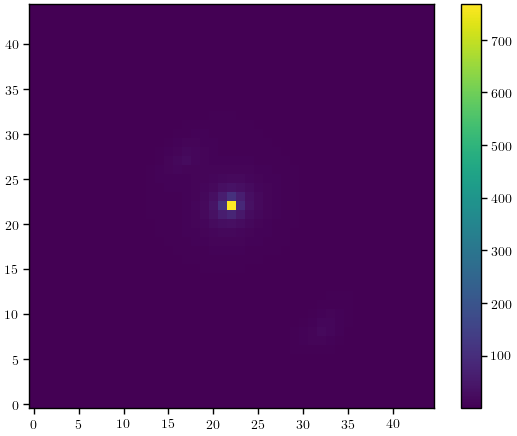

In [3]:
sb = lens.get_array(num_pix, side, band, zp)

plt.imshow(sb)
plt.colorbar()
plt.show()

In [8]:
print(f'Summing sb: {np.sum(sb)} flux per square arcsec')
print(f'Total cps: {lens.get_total_flux_cps(band, zp)} photons per second')

Summing sb: 4799.685641780252 flux per square arcsec
Total cps: 4279.395113038187 photons per second
